# _MOVIES_

## 10121069 - Deri Rizky Nugraha (Berkontribusi)
## 10121077 - Fauzan Fadhil Moricio (Berkontribusi)
## 10121044 - Yulia Anggiani (Berkontribusi)
## 10121075 - Wildan Permana (Berkontribusi)
## 10121042 - Rahman Hakim Putra Tambunan (Berkontribusi)
## 10121065 - Muhammad Hafizh Arrosyidu (Berkontribusi)

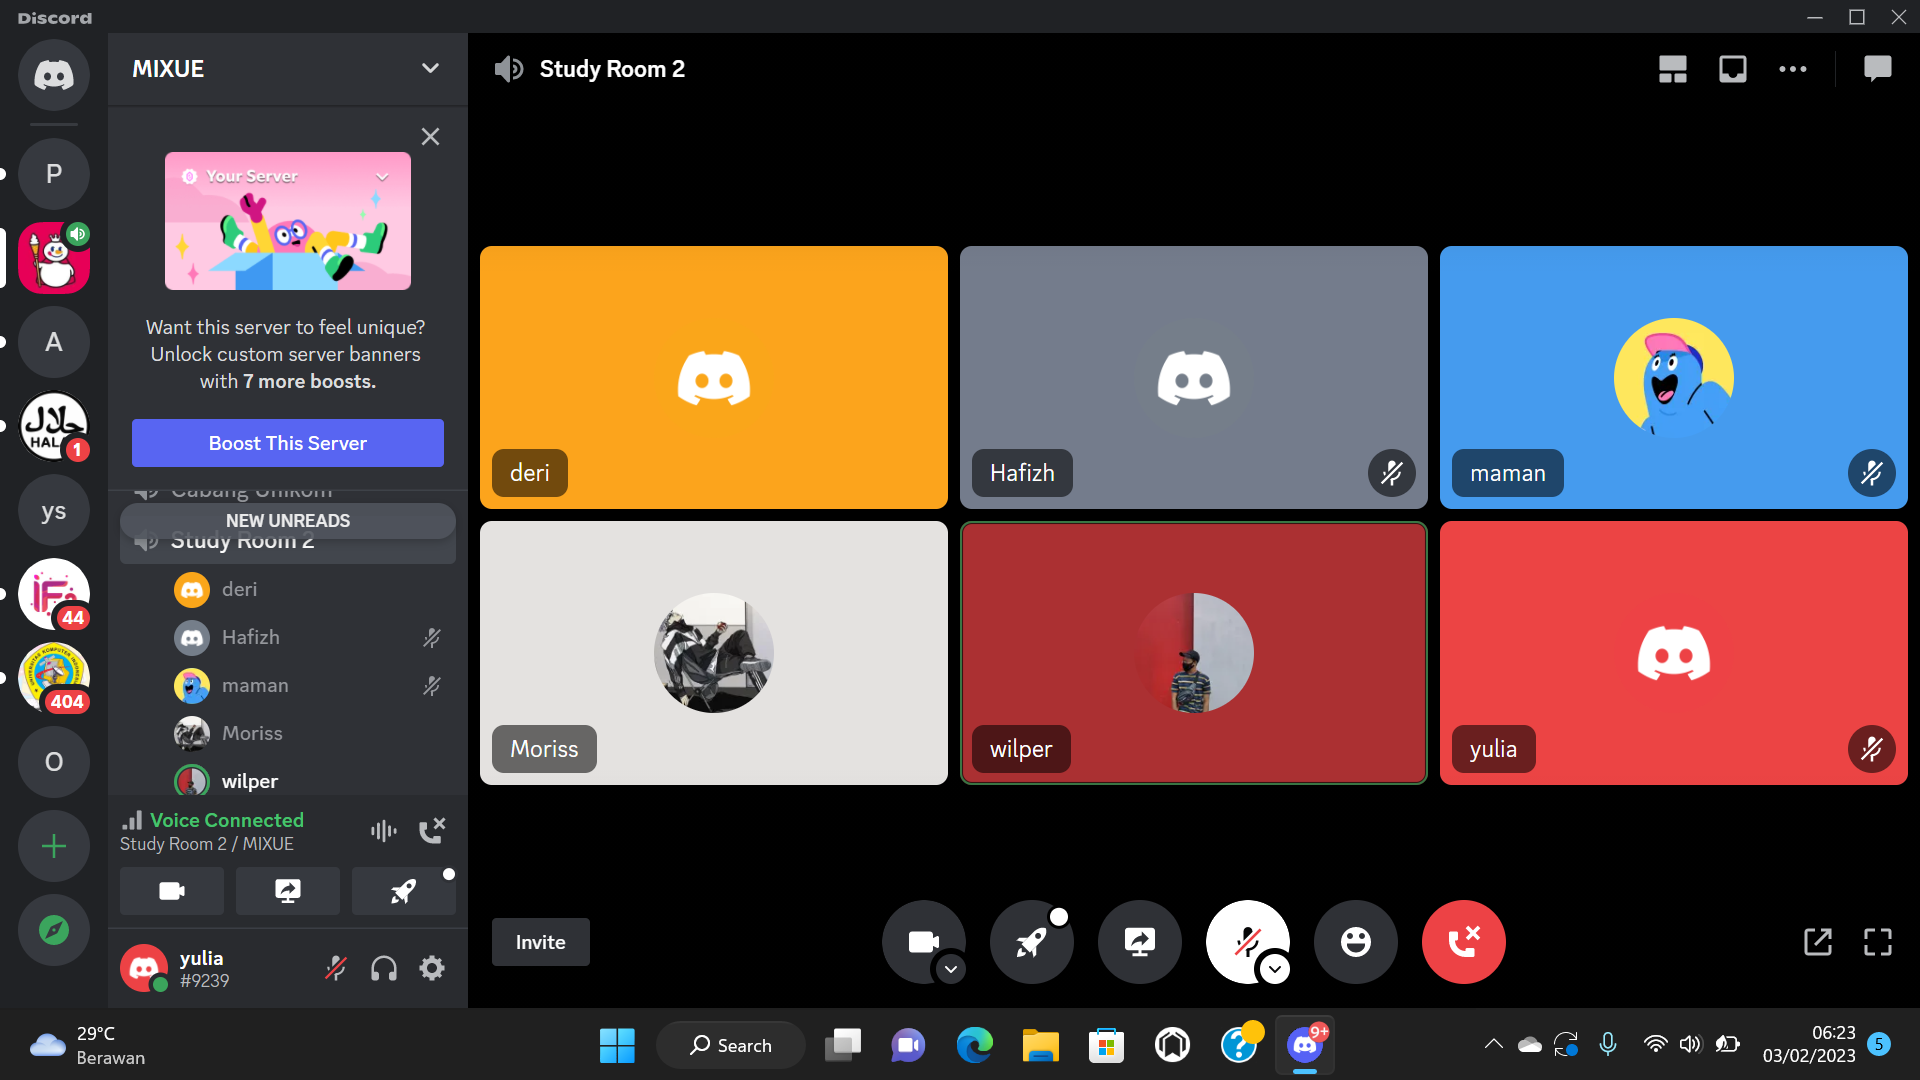

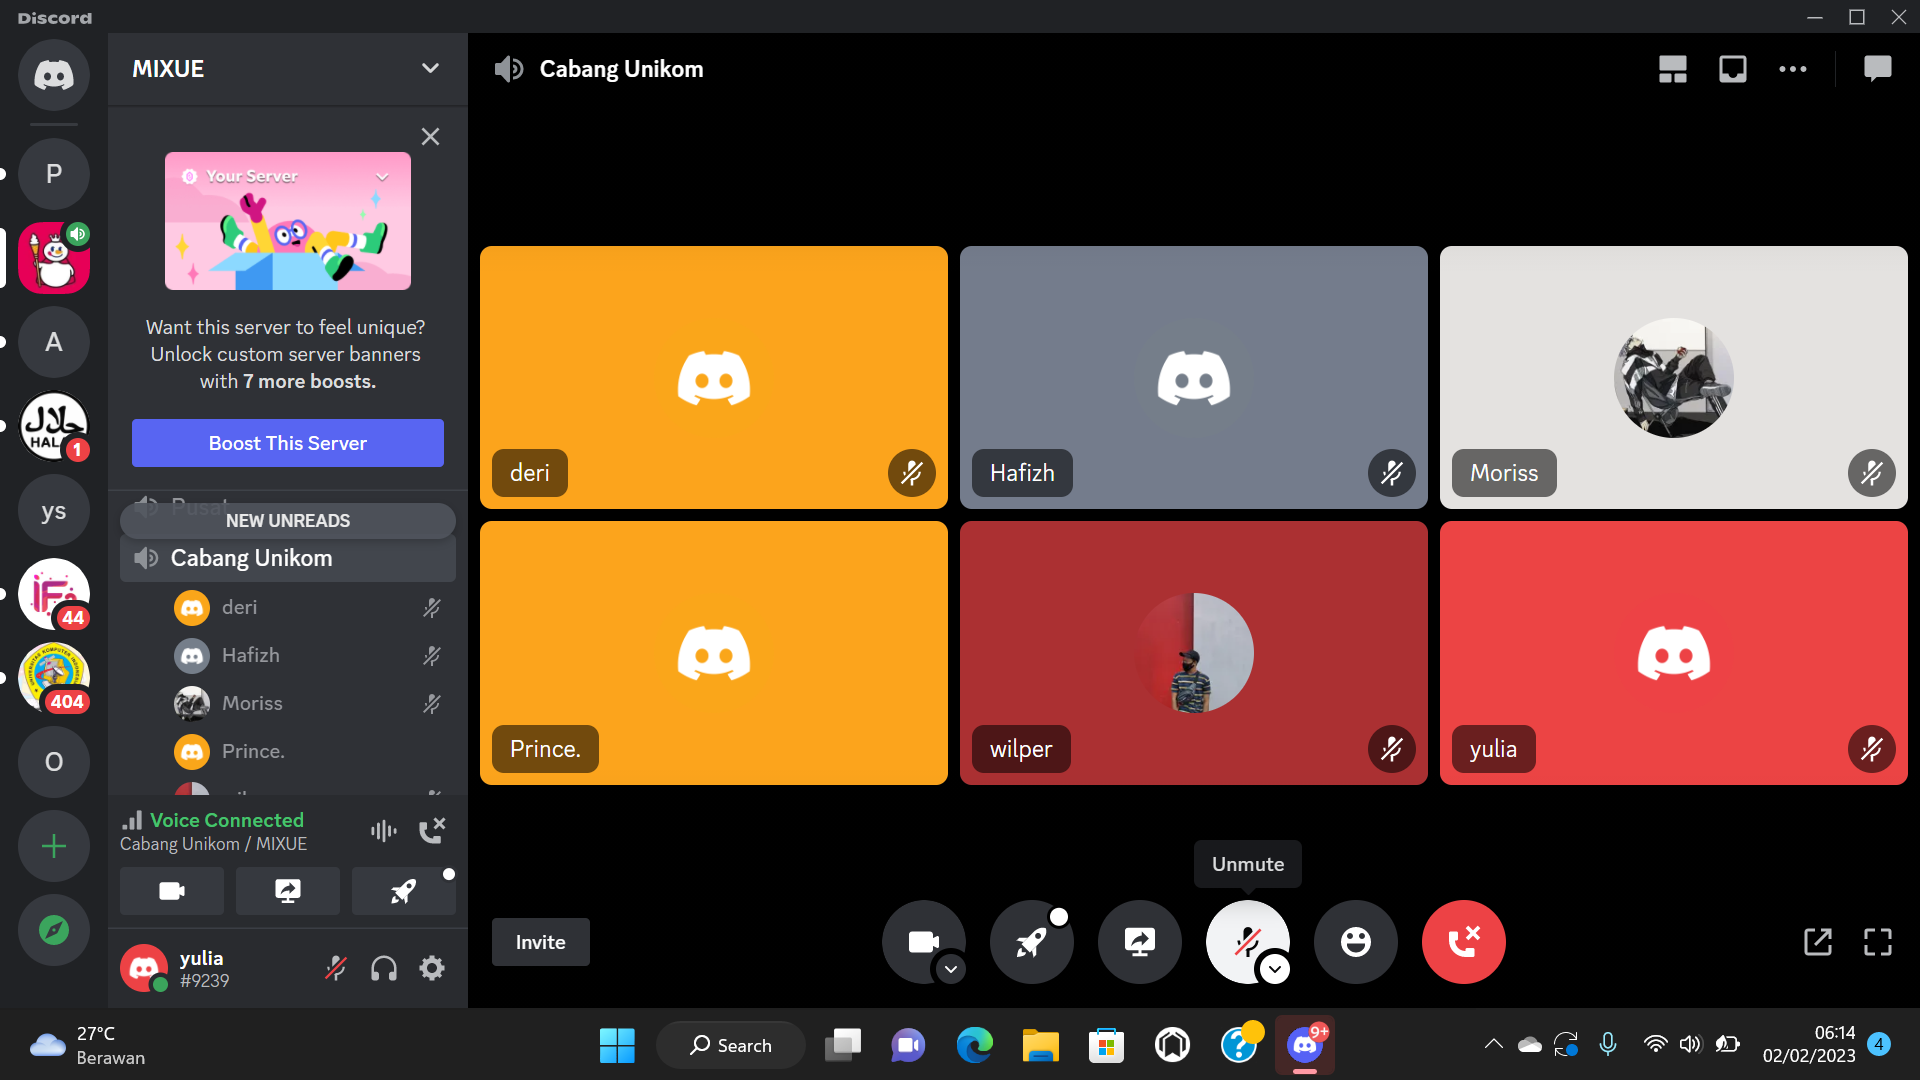

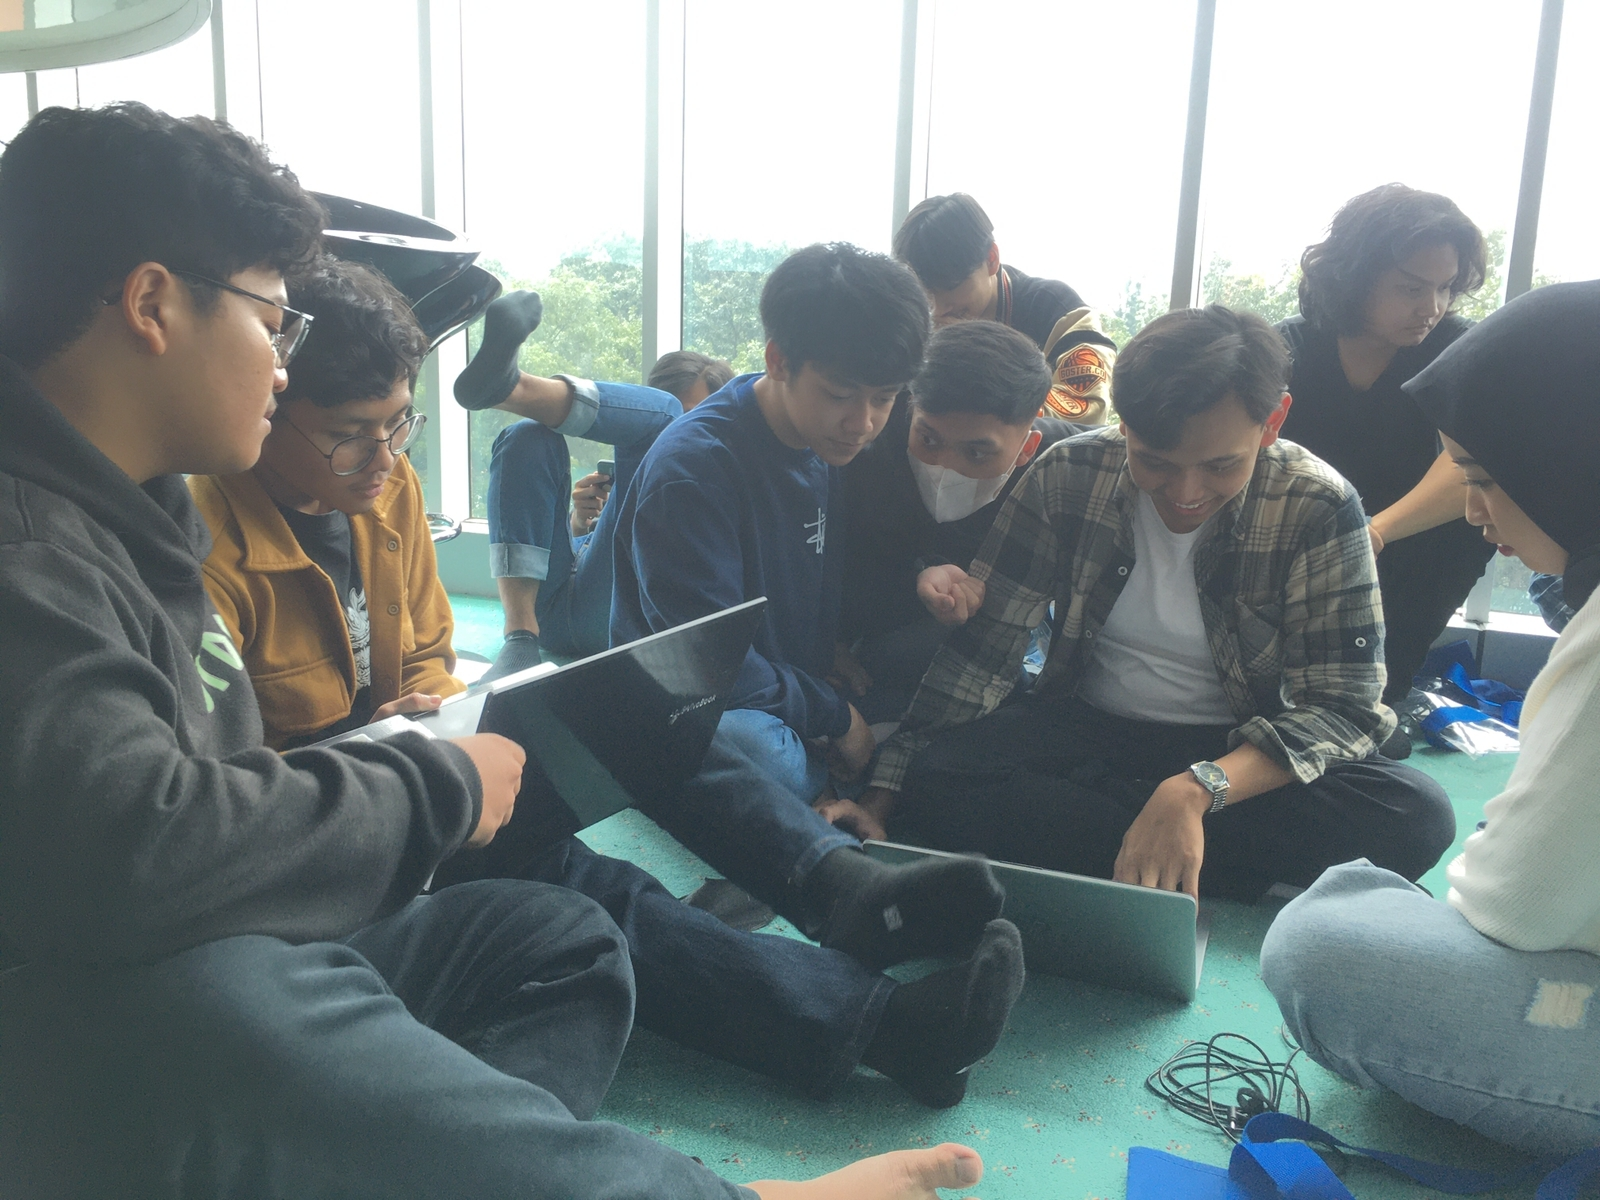

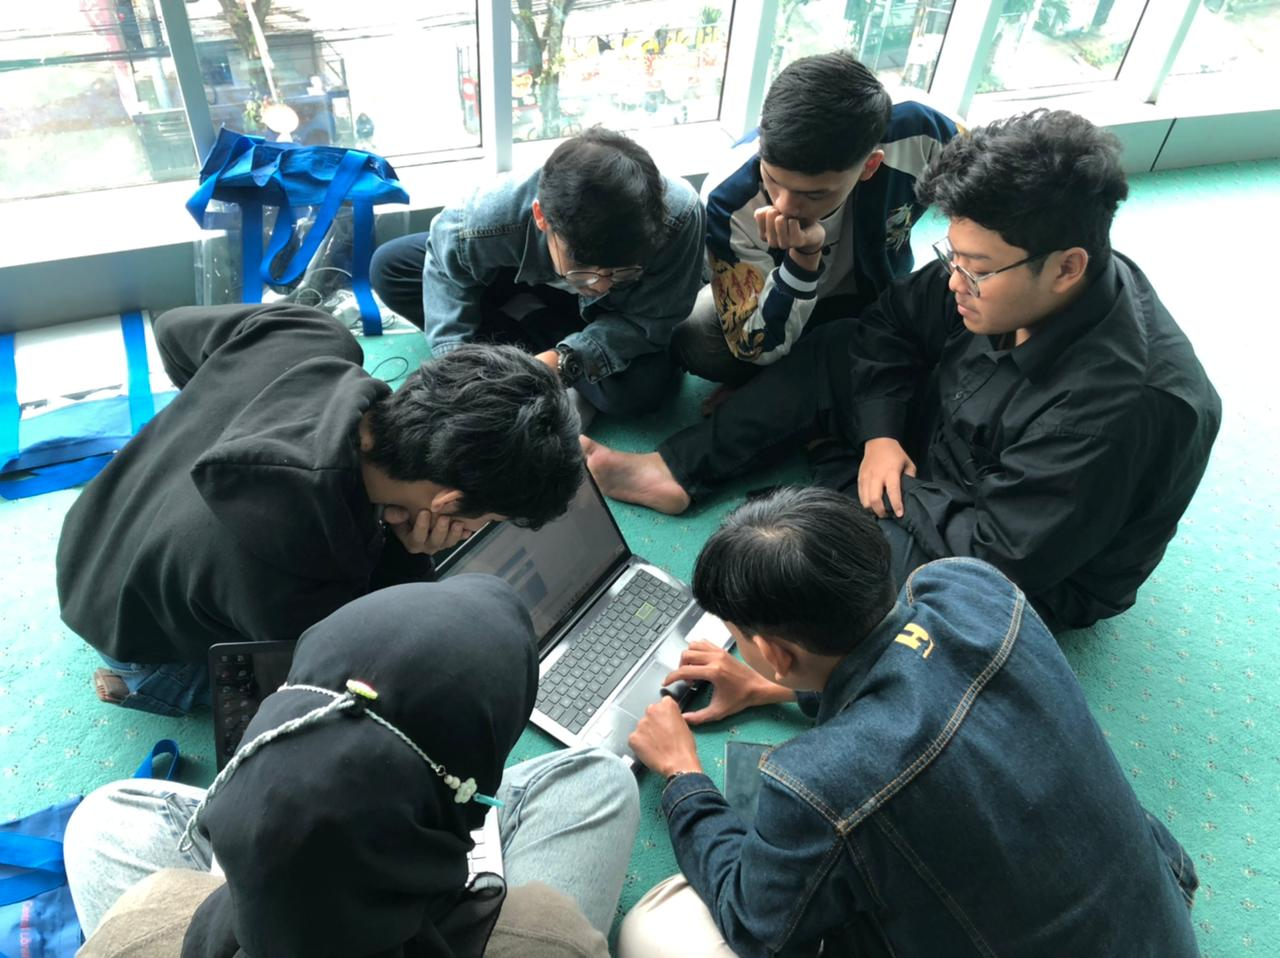

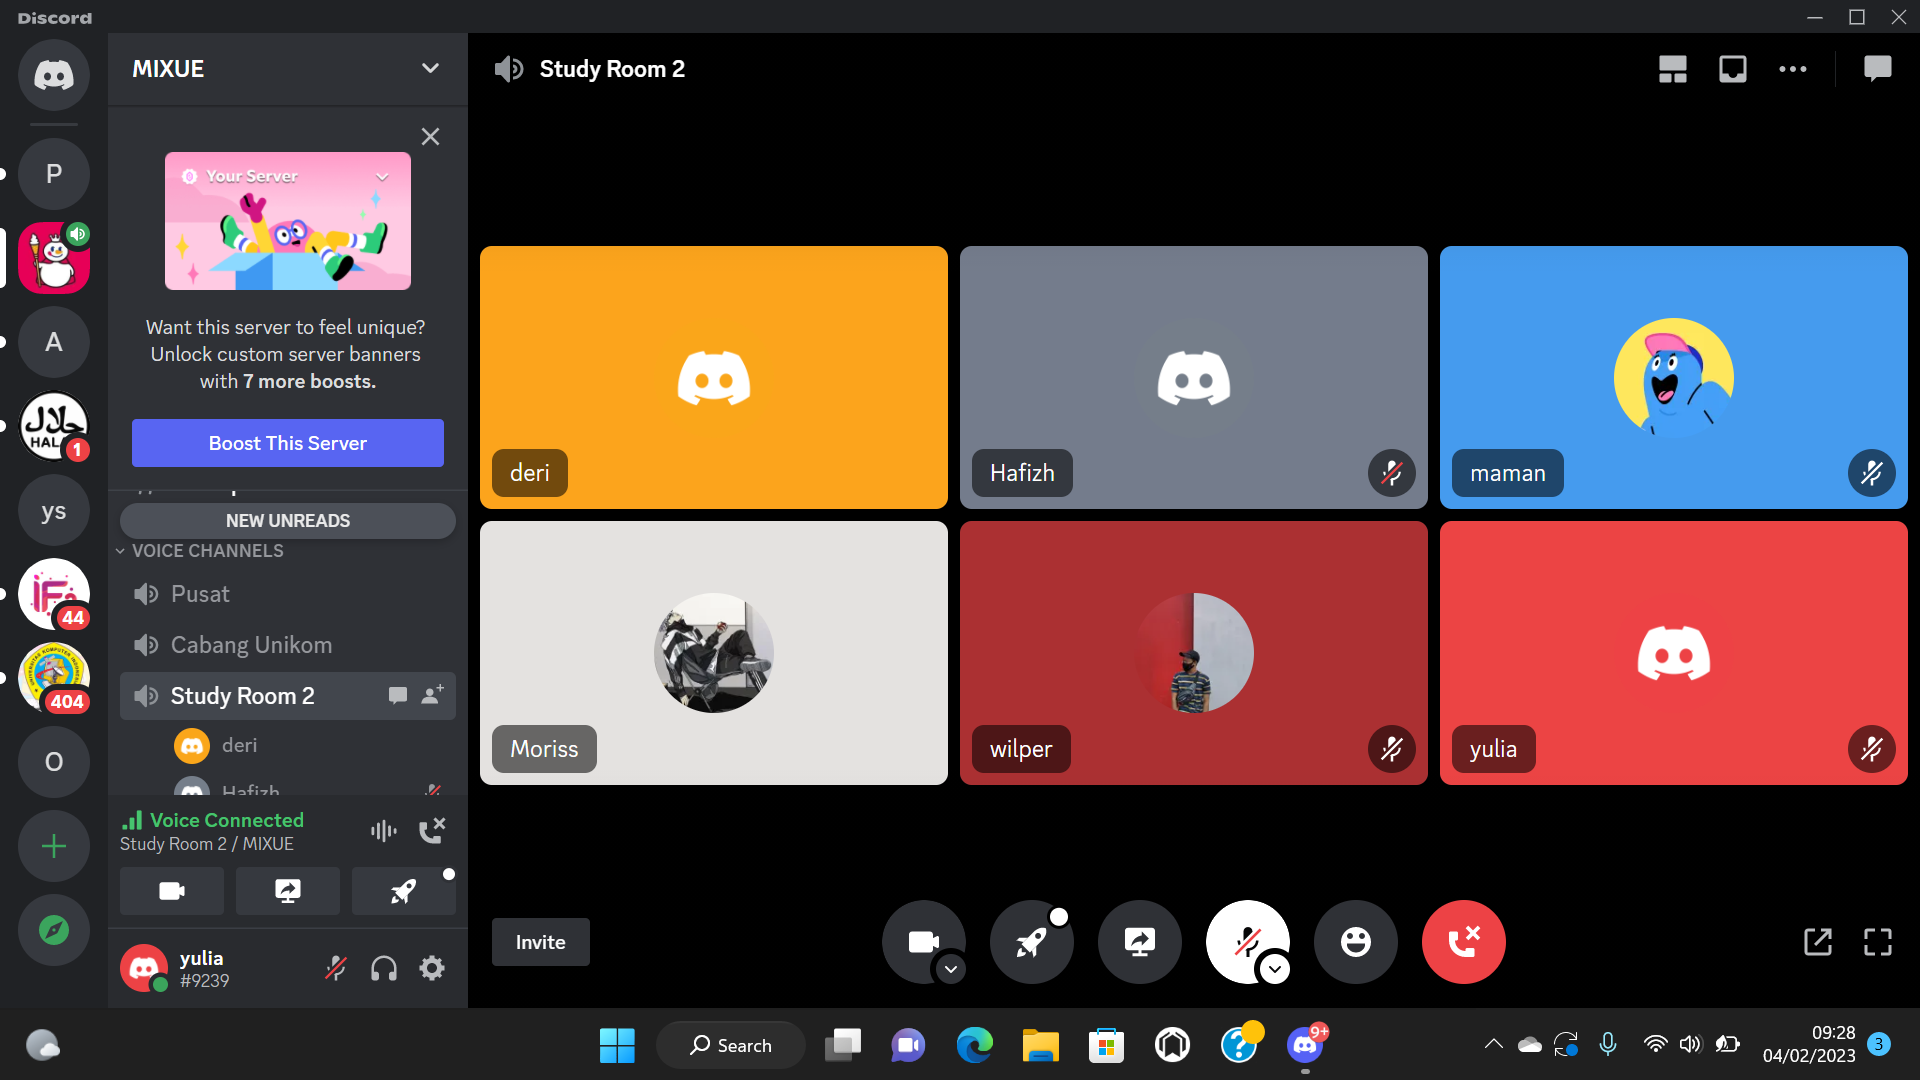

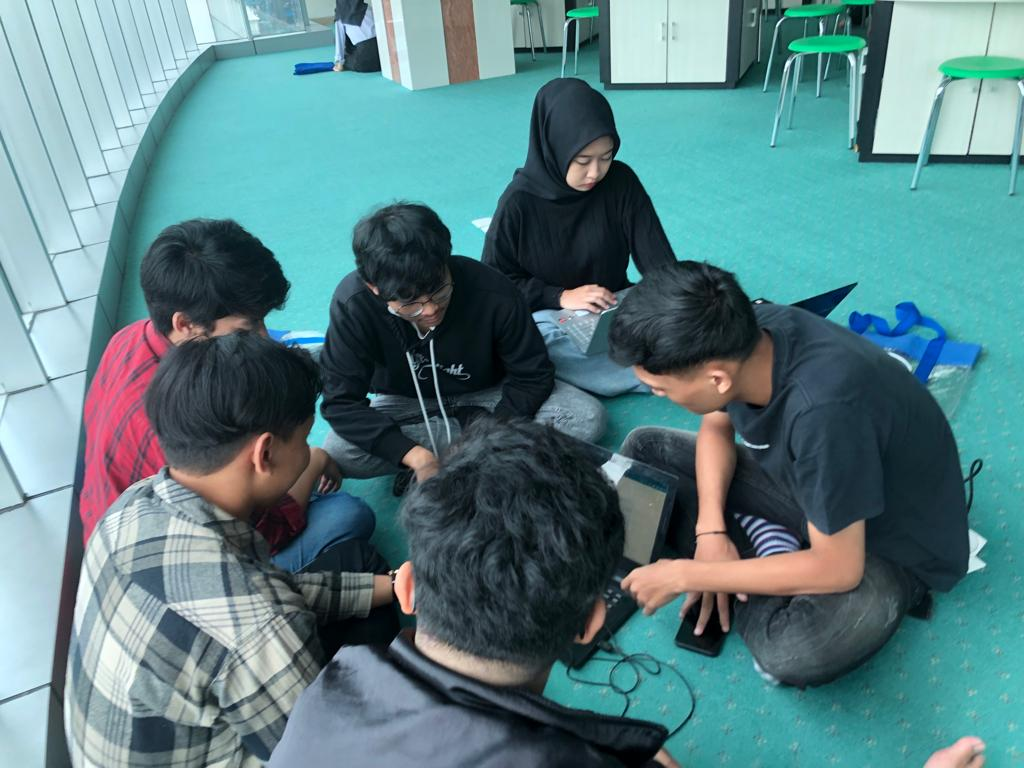

## Latar Belakang dan Tujuan 

#### Latar belakang kami mengambil tema ini karena ingin mengetahui informasi terkait berbagai macam film dan datanya cukup banyak dan menarik serta dilengkapi nama-nama negara.
#### Tujuannya adalah untuk mendapatkan insight terkait pengaruh budget terhadap pendapatan dan kepopuleran.


## ISI TUGAS BESAR

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
df = pd.read_excel('movies_fix.xlsx')

df

,budget,genres,homepage,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,web-scraper-order,web-scraper-start-url,Unnamed: 21,lat,long,Unnamed: 24,LATITUDE,LONGITUDE
0,237000000,"Action, Adventure, Fantasy, Science Fi...",http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150437577,"Ingenious Film Partners, id: 289, Twentieth Ce...","United States of America, United Kingdom",...,2023-02-07 00:00:00,11800,1675659770-14413,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,-2,37.999733,-100.678503
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139082615,"Walt Disney Pictures, id: 2, Jerry Bruckheimer...",United States of America,...,2023-09-06 00:00:00,4500,1675659770-14414,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,-1,38.999733,-99.678503
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107376788,"Columbia Pictures, id: 5, Danjaq, id: 10761, B...","United Kingdom, United States of America",...,2023-03-06 00:00:00,4466,1675659770-14415,https://yuliaanggiani.github.io/moviess/,NaN,107.609706,-6.897341,-2,105.609706,-8.897341
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,11231295,"Legendary Pictures, id: 923, Warner Bros., id:...",United States of America,...,2023-06-07 00:00:00,9106,1675659770-14416,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,0,39.999733,-98.678503
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43926995,"Walt Disney Pictures, id: 2",United States of America,...,2023-01-06 00:00:00,2124,1675659770-14417,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,-1,38.999733,-99.678503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,7700000,Romance,http://www.facebook.com/YehJawaaniHaiDeewani,185008,hi,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani features two polar opp...,3353176,"Dharma Productions, id: 19146",India,...,2023-02-07 00:00:00,79,1675659770-17629,https://yuliaanggiani.github.io/moviess/,NaN,54.702354,-3.276575,0,54.702354,-3.276575
3217,8250000,"Drama, History, Romance",NaN,11620,en,Quo Vadis,"Set against the back drop of Rome in crisis, G...",7973109,"Metro-Goldwyn-Mayer (MGM), id: 8411",United States of America,...,7,63,1675659770-17630,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,1,40.999733,-97.678503
3218,0,"Horror, Comedy, Music, Science Fiction",NaN,14353,en,Repo! The Genetic Opera,A worldwide epidemic encourages a bio-tech com...,5897479,"Lions Gate Films, id: 35, Twisted Pictures, id...",United States of America,...,2023-07-06 00:00:00,100,1675659770-17631,https://yuliaanggiani.github.io/moviess/,NaN,39.999733,-98.678503,-1,38.999733,-99.678503
3219,10000000,"Adventure, Drama, Action",NaN,11818,tr,Kurtlar vadisi - Irak,The movie opens with a fictionalized depiction...,1465762,"Pana Film, id: 58135","TR, Turkey",...,2023-03-04 00:00:00,7,1675659770-17632,https://yuliaanggiani.github.io/moviess/,NaN,54.702354,-3.276575,-2,52.702354,-5.276575


# 5 film dengan pendapatan tertinggi

In [50]:
df_rev= df.groupby('title')['revenue'].mean().reset_index()
df_rev.sort_values("revenue")
df_rev.nlargest(n=5, columns="revenue")

5 film dengan pendapatan tertinggi


,title,revenue
237,Avatar,2.787965e+09
2960,Titanic,1.845034e+09
2289,The Avengers,1.519558e+09
1265,Jurassic World,1.513529e+09
913,Furious 7,1.506249e+09


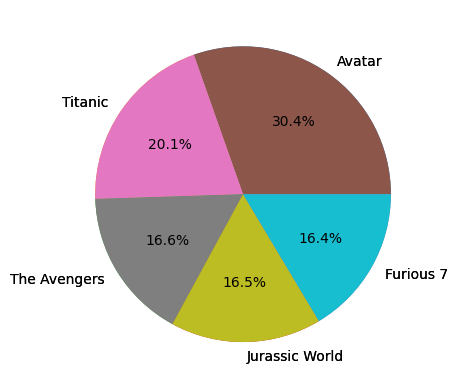

In [42]:
import matplotlib.pyplot as plt 

title = ['Avatar', 'Titanic', 'The Avengers', 'Jurassic World', 'Furious 7']
revenue = [2.787965e+09, 1.845034e+09, 1.519558e+09, 1.513529e+09, 1.506249e+09] 
plt.pie(revenue, labels=title) 

plt.pie(
    revenue, 
    labels=title, 
    autopct= '%1.1f%%'
)

plt.show()

# 5 film dengan jumlah penonton terbanyak

In [43]:
df_pop= df.groupby('title')['popularity'].mean().reset_index()
df_pop.sort_values("popularity")
df_pop.nlargest(n=5, columns="popularity")

,title,popularity
1509,Minions,875581305.0
1190,Interstellar,724247784.0
623,Deadpool,514569956.0
995,Guardians of the Galaxy,481098624.0
1420,Mad Max: Fury Road,434278564.0


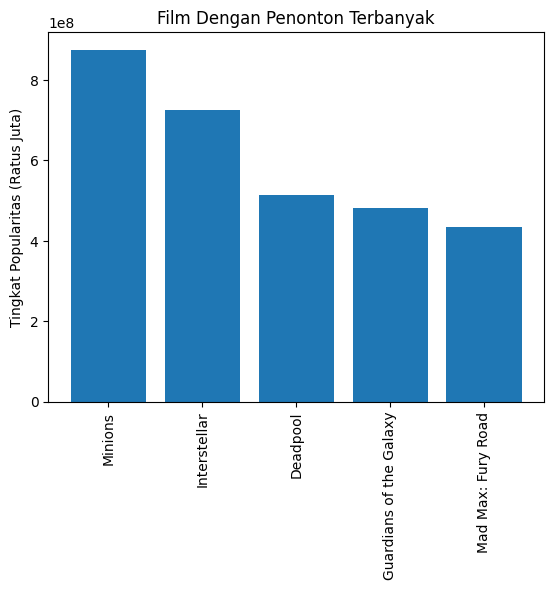

In [51]:
original_title = ['Minions', 'Interstellar', 'Deadpool', 'Guardians of the Galaxy', 'Mad Max: Fury Road']
popularity = [875581305.0, 724247784.0, 514569956.0, 481098624.0, 434278564.0]

x_coords = np.arange(len(original_title)) #arange memberikan interval

#print(x_coords)

plt.bar(
    x_coords, 
    popularity, 
    tick_label= original_title
) 

plt.xticks(rotation=90) 
plt.ylabel('Tingkat Popularitas (Ratus Juta)') 
plt.title('Film Dengan Penonton Terbanyak') 

plt.show()

# Pengaruh Budget Terhadap Pendapatan

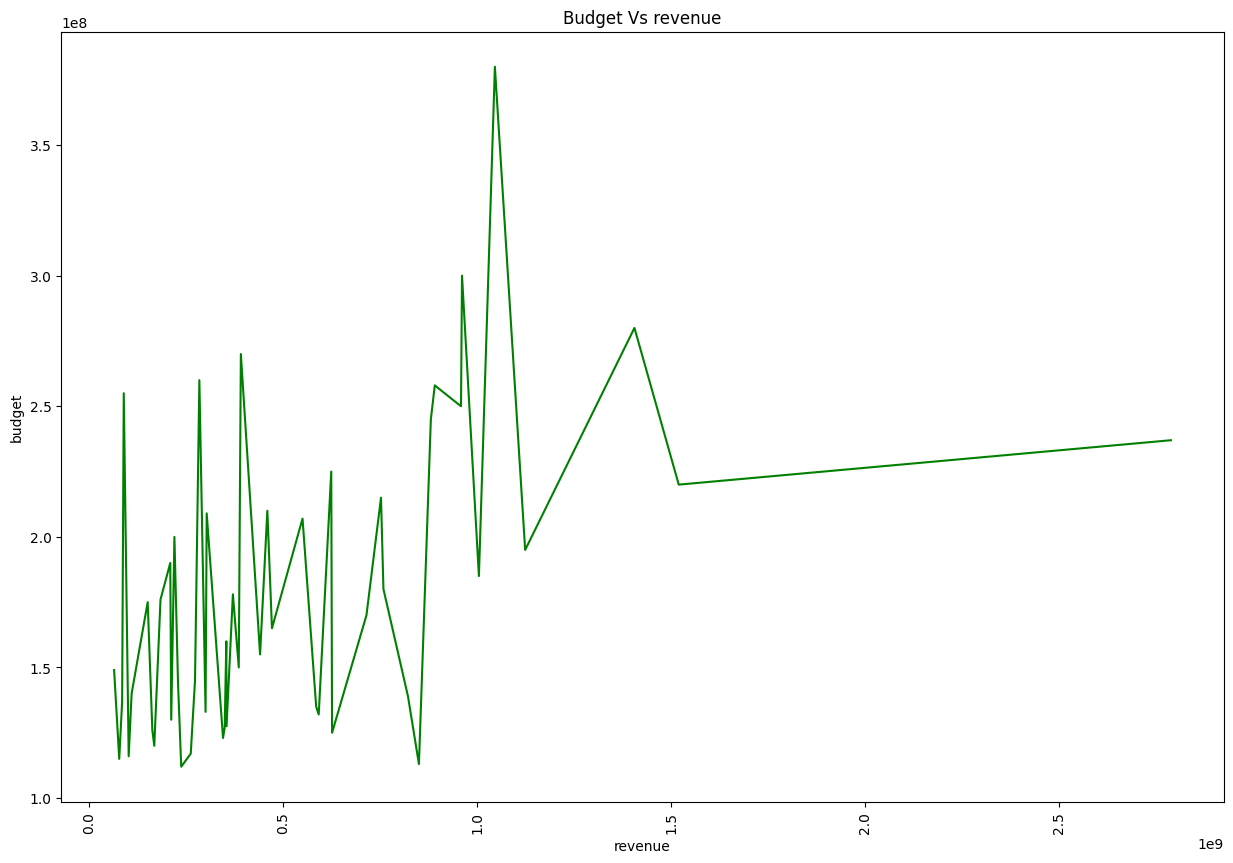

In [47]:
moviesbybudget=df[['budget', 'revenue']].sort_values(by="budget",ascending=False)
moviesbybudget=moviesbybudget.drop_duplicates(subset = "revenue")
moviesbybudget=moviesbybudget.drop_duplicates(subset = "budget")
moviesbybudget=moviesbybudget.head(50)
#print(moviesbybudget)
plt.figure(figsize=(15,10))
graph=sns.lineplot(y='budget',x='revenue',color='g',data=moviesbybudget)
graph.set_title('Budget Vs revenue')
plt.xticks(rotation=90)
plt.show()

# Persebaran Lokasi Syuting

In [31]:
import pandas as pd
import folium

missing_value_format = ["N.A","na","n.a.","?","-","Nan"] #Mendefinisikan format missing value
df_movie = pd.read_excel('movies_fix.xlsx',na_values = missing_value_format)
df_movie
df_movie_filter = df_movie[['title','LATITUDE', 'LONGITUDE']]
df_movie_filter

df_sample= df_movie_filter.sample(n=50)

map = folium.Map(location=[df_sample.LATITUDE.mean(), 
                           df_sample.LONGITUDE.mean()], 
                           zoom_start=1, control_scale=True)
for index, location_info in df_sample.iterrows():
    folium.Marker([location_info["LATITUDE"], location_info["LONGITUDE"]], popup=location_info["title"]).add_to(map)

map